In [5]:
library(tidyverse)
library(repr)
library(tid|ymodels)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(tid | ymodels): 'package' must be of length 1


In [9]:
players <- read_csv("data/players.csv")
players <- players |> na.omit()

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
players_exp <- players |>
    select(experience, subscribe)

players_exp_count <- players_exp |>
    group_by(experience, subscribe) |>
    count()

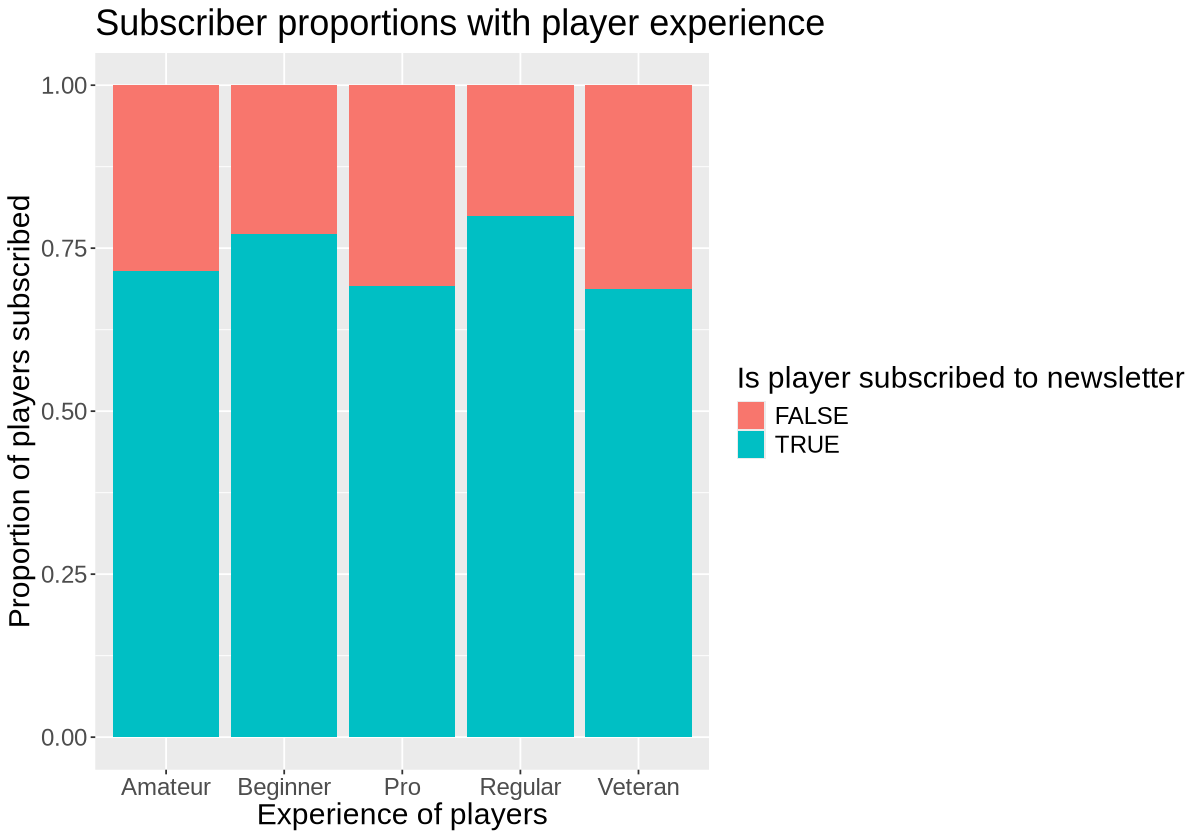

In [11]:
options(repr.plot.width = 10, repr.plot.height = 7)
players_exp_plot <- players_exp_count |>
    ggplot(aes(x = experience, y = n, fill = subscribe)) +
    geom_bar(stat = 'identity', position = 'fill') +
    labs(x = "Experience of players", y = "Proportion of players subscribed", title = "Subscriber proportions with player experience", 
            fill = "Is player subscribed to newsletter") +
    theme(text = element_text(size = 18))
players_exp_plot

In order to justify our method we should explore the relationships between the variables present. We first seek to analyze the relevancy of the experience variable by plotting the proportions of subscribers in each experience category.

From this plot, there does not appear to be any correlation between the experience and subscribe variables; the relationship is constant. Hence it does not seem that experience will be a good predictor of subscriber status because each experience variable will provide approximately the same output.

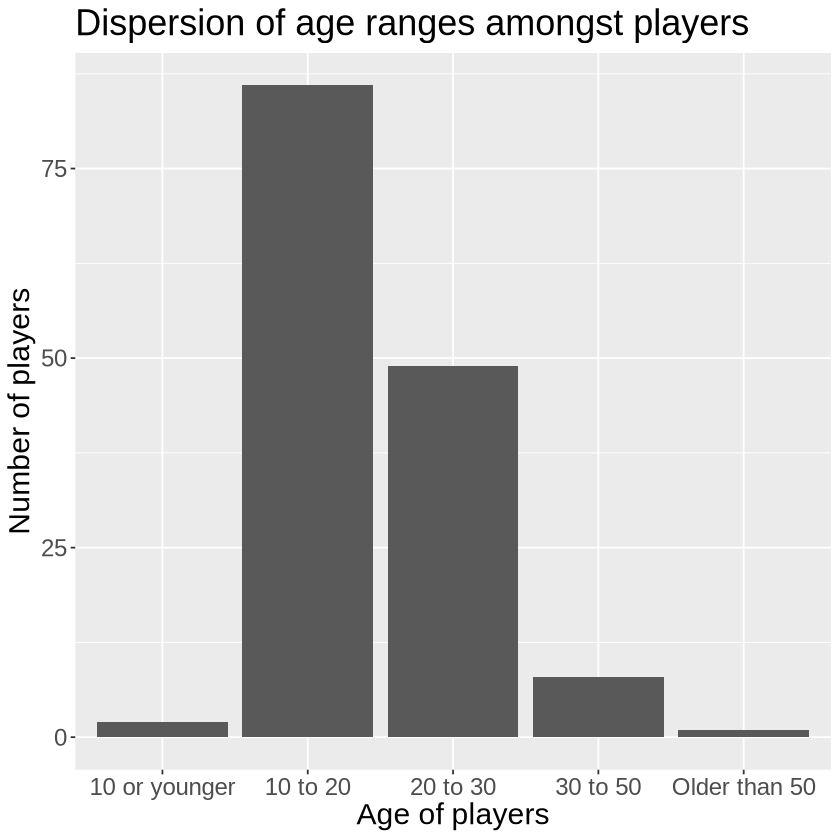

In [12]:
players_age <- players |>
    select(Age, subscribe)

players_age_ranges <- players_age |>
    mutate(
    range = case_when(
      Age <= 10 ~ "10 or younger",
      Age > 10 & Age <= 20 ~ "10 to 20",
      Age > 20 & Age <= 30 ~ "20 to 30",
      Age > 30 & Age <= 50 ~ "30 to 50",
      Age > 50 ~ "Older than 50" ))

players_age_ranges_count <- players_age_ranges |>
    group_by(range,subscribe) |>
    count()

options(repr.plot.width = 7, repr.plot.height = 7)

players_age_range_count_plot <- players_age_ranges_count |>
    ggplot(aes(x = range, y = n)) +
    geom_bar(stat = 'identity', position = 'dodge') + 
     labs(x = "Age of players", y = "Number of players", title = "Dispersion of age ranges amongst players") +
    theme(text = element_text(size = 18))

players_age_range_count_plot

The above plot is to highlight that the age category is highly biased towards a certain age group. This is expected, though could make it a less reliable predictor. We explore this below.

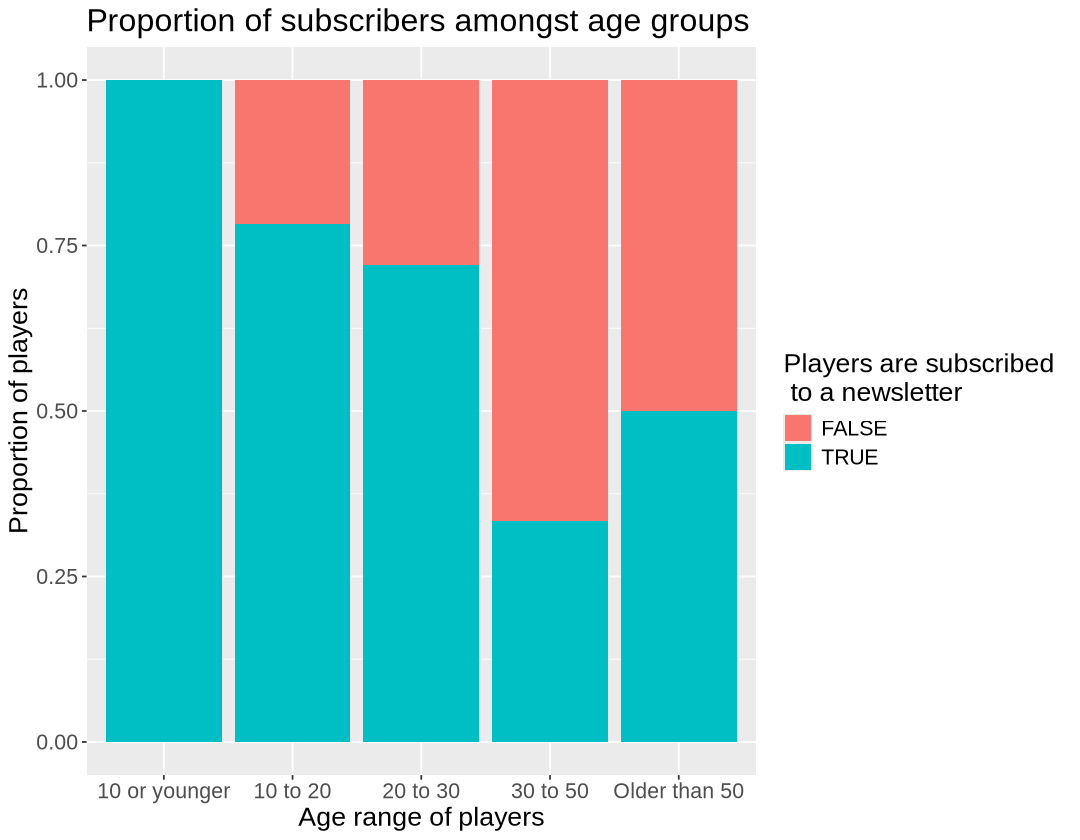

In [13]:
options(repr.plot.width = 9, repr.plot.height = 7)

players_age_ranges_propplot <- players_age_ranges_count |>
    ggplot(aes(x = range, y = n, fill = subscribe)) + 
    geom_bar(stat = 'identity', position = 'fill') +
    labs(x = "Age range of players", y = "Proportion of players", title = "Proportion of subscribers amongst age groups",
        fill = "Players are subscribed \n to a newsletter") +
    theme(text = element_text(size = 16))
players_age_ranges_propplot

So regardless, we do still see a negative relationship between subscriber count and age. Specifically, players who are older are less likely to be subscribed. This relationship seems to be pretty strong, so it seems a good contender for a predictor.

In [14]:
players_hrs <- players |>
   select(played_hours, subscribe)

In [15]:
players_hrs_ranges <- players_hrs |>
    mutate(
    range = case_when(
      played_hours == 0 ~ "0",
      played_hours > 0 & played_hours <= 0.5 ~ "0 to 0.5",
      played_hours > 0.5 & played_hours <= 1 ~ "0.5 to 1",
      played_hours > 1 & played_hours <= 2 ~ "1 to 2",
      played_hours > 2 & played_hours <= 5 ~ "2 to 5",
    played_hours > 5 ~ "More than 5"))
    
players_hrs_ranges_count <- players_hrs_ranges |>
    group_by(range) |>
    count()
players_hrs_ranges_count

range,n
<chr>,<int>
0,85
0 to 0.5,56
0.5 to 1,17
1 to 2,11
2 to 5,10
More than 5,15


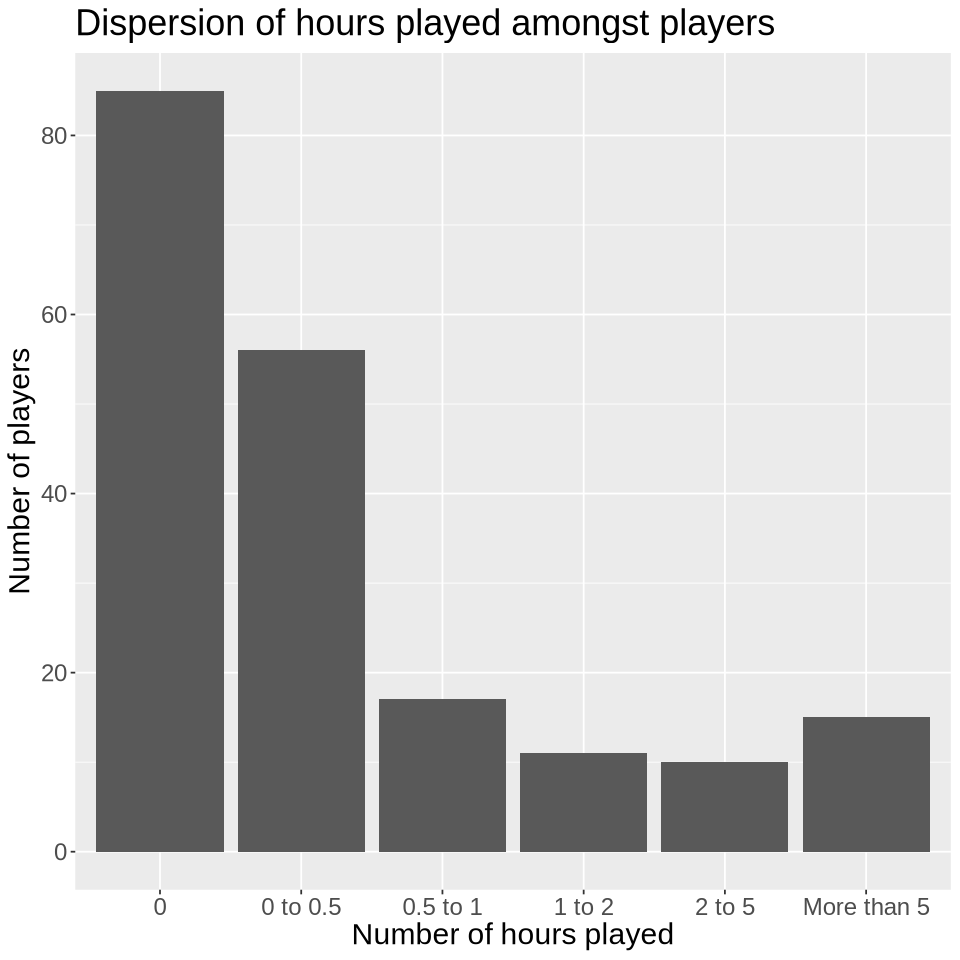

In [16]:
options(repr.plot.width = 8, repr.plot.height = 8)

players_hrs_plot <- players_hrs_ranges_count |>
    ggplot(aes(x = range, y = n)) +
    geom_bar(stat = 'identity', position = 'dodge') + 
     labs(x = "Number of hours played", y = "Number of players", title = "Dispersion of hours played amongst players") +
    theme(text = element_text(size = 18))

players_hrs_plot

Similarly to the age category, the hours played category is very skewed. However, this bias is more concering because it is telling us that most people just logged on and barely played at all, meaning those players data has very little to do with the implications of playing on the server.

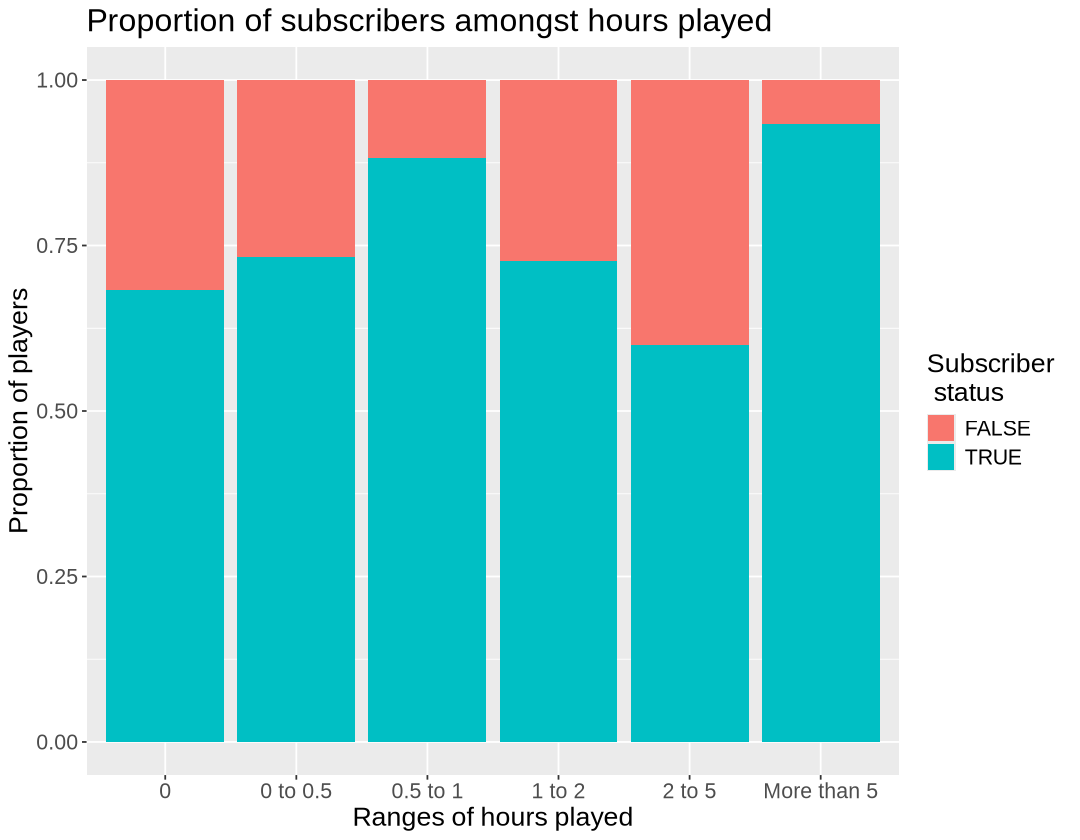

In [17]:
options(repr.plot.width = 9, repr.plot.height = 7)

players_hrs_propplot <- players_hrs_ranges |>
    group_by(range, subscribe) |>
    count() |>
    ggplot(aes(x = range, y = n, fill = subscribe)) + 
    geom_bar(stat = 'identity', position = 'fill') +
    labs(x = "Ranges of hours played", y = "Proportion of players", title = "Proportion of subscribers amongst hours played",
        fill = "Subscriber \n status") +
    theme(text = element_text(size = 16))
players_hrs_propplot

Even with the biased data, we see an interesting bell-shaped curve appear when measuring the subscriber proportions amongst players, other than those very committed to the game. Hence it may have some relevant influence as a predictor.

In [18]:
players_expage <- players |>
    select(experience, Age)

players_expage_ranges <- players_expage |>
    mutate(
    range = case_when(
      Age <= 10 ~ "10 or younger",
      Age > 10 & Age <= 20 ~ "10 to 20",
      Age > 20 & Age <= 30 ~ "20 to 30",
      Age > 30 & Age <= 50 ~ "30 to 50",
      Age > 50 ~ "Older than 50" ))

players_expage_ranges_count <- players_expage_ranges |>
    group_by(range, experience) |>
    count()

players_expage_ranges_count$experience <- factor(players_expage_ranges_count$experience,
                      levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran"))

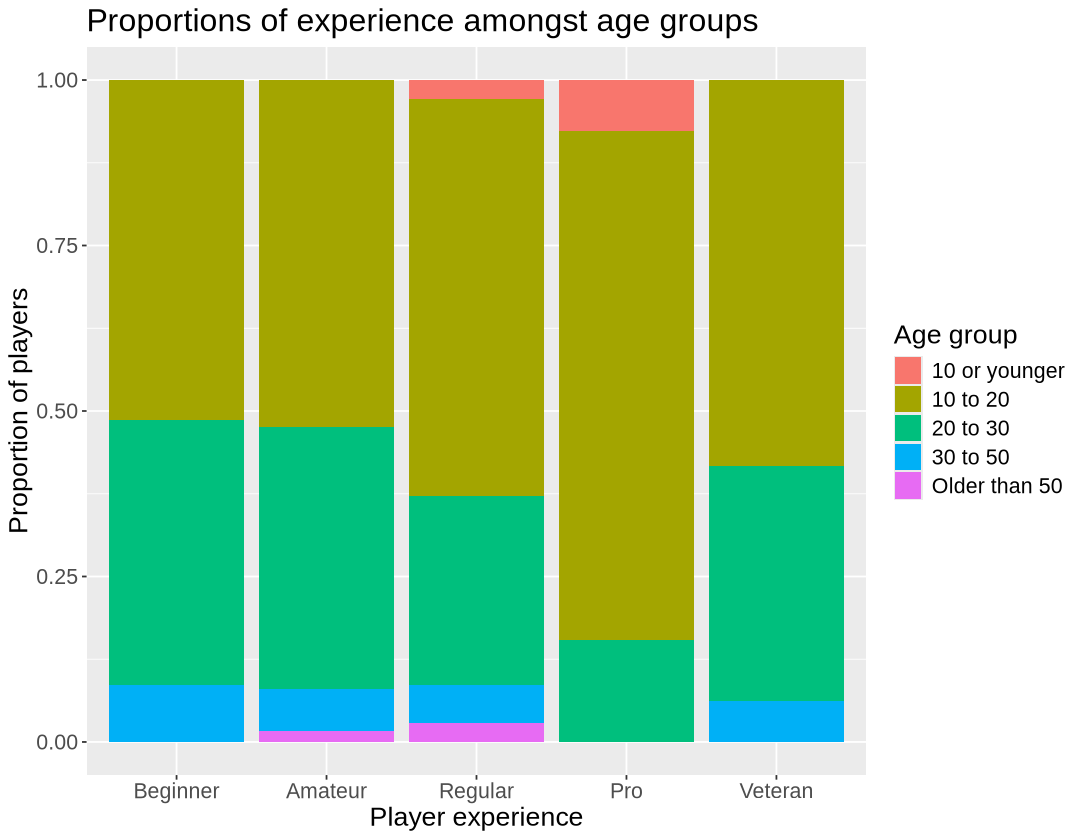

In [19]:
players_expage_propplot <- players_expage_ranges_count |>
    ggplot(aes(x = experience, y = n, fill = range)) + 
    geom_bar(stat = 'identity', position = 'fill') +
    labs(x = "Player experience", y = "Proportion of players", title = "Proportions of experience amongst age groups",
        fill = "Age group") +
    theme(text = element_text(size = 16))

players_expage_propplot

In [22]:
procount <- players |>
    filter(experience == "Pro") |>
    nrow()
procount

[1] 13

To further explore whether we should exclude experience, we can visualize its relationship with age and playtime. 
As seen above, the proportions are more or less constant, with the only outlier being the "pro" category. However, this could simply have to do with the low amount of players in the "pro" category, and even then the pattern is maintained.

We derive the same conclusion from the plot below. Thus it seems unlikely that the player experience is variable against any of the other categories in the data, and hence we should be justified in ommiting it as a predictor.

In [173]:
players_exphrs <- players |>
    select(played_hours, experience)

players_exphrs_ranges <- players_exphrs |>
    mutate(
    range = case_when(
      played_hours == 0 ~ "0",
      played_hours > 0 & played_hours <= 0.5 ~ "0 to 0.5",
      played_hours > 0.5 & played_hours <= 1 ~ "0.5 to 1",
      played_hours > 1 & played_hours <= 2 ~ "1 to 2",
      played_hours > 2 & played_hours <= 5 ~ "2 to 5",
    played_hours > 5 ~ "More than 5"))
    
players_exphrs_ranges_count <- players_exphrs_ranges |>
    group_by(range, experience) |>
    count()

players_exphrs_ranges_count$experience <- factor(players_exphrs_ranges_count$experience,
                      levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran"))

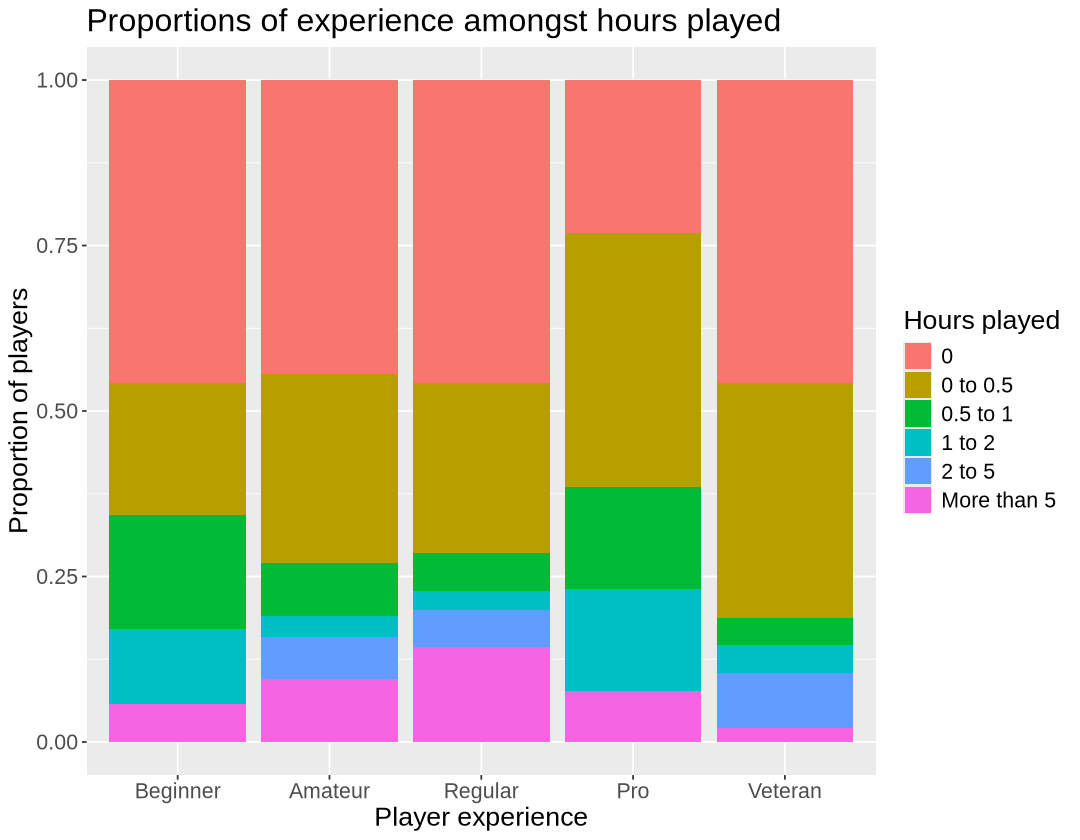

In [174]:
players_exphrs_propplot <- players_exphrs_ranges_count |>
    ggplot(aes(x = experience, y = n, fill = range)) + 
    geom_bar(stat = 'identity', position = 'fill') +
    labs(x = "Player experience", y = "Proportion of players", title = "Proportions of experience amongst hours played",
        fill = "Hours played") +
    theme(text = element_text(size = 16))

players_exphrs_propplot